# Regresión Logística
Clasifica las entradas en 2 o más categorías, por ejemplo:
* Setas: Venenosa, no venenosa   --> 2 categorías.
* Imagen de una letra: Qué letra --> 27 categorías.
* Cliente y sus datos: Va a comprar o no nuestro producto --> 2 categorías.

La regresión logística utiliza la función sigmoide.<br>
Si la regresión lineal utilizada la hipótesis: $y = \alpha + \beta x$ (lo que en clase llamaba $\theta x$), la regresión logística utiliza la hipótesis:<br><br>
$$y = \frac{1}{1 + e^{-(\alpha + \beta x)}}$$

$$y \in [0,1]$$

<br>
Las variables de entrada siguen pudiendo ser numéricas o categóricas.<br>
La variable de salida es la probabilidad de pertenencia a cada categoría de salida.

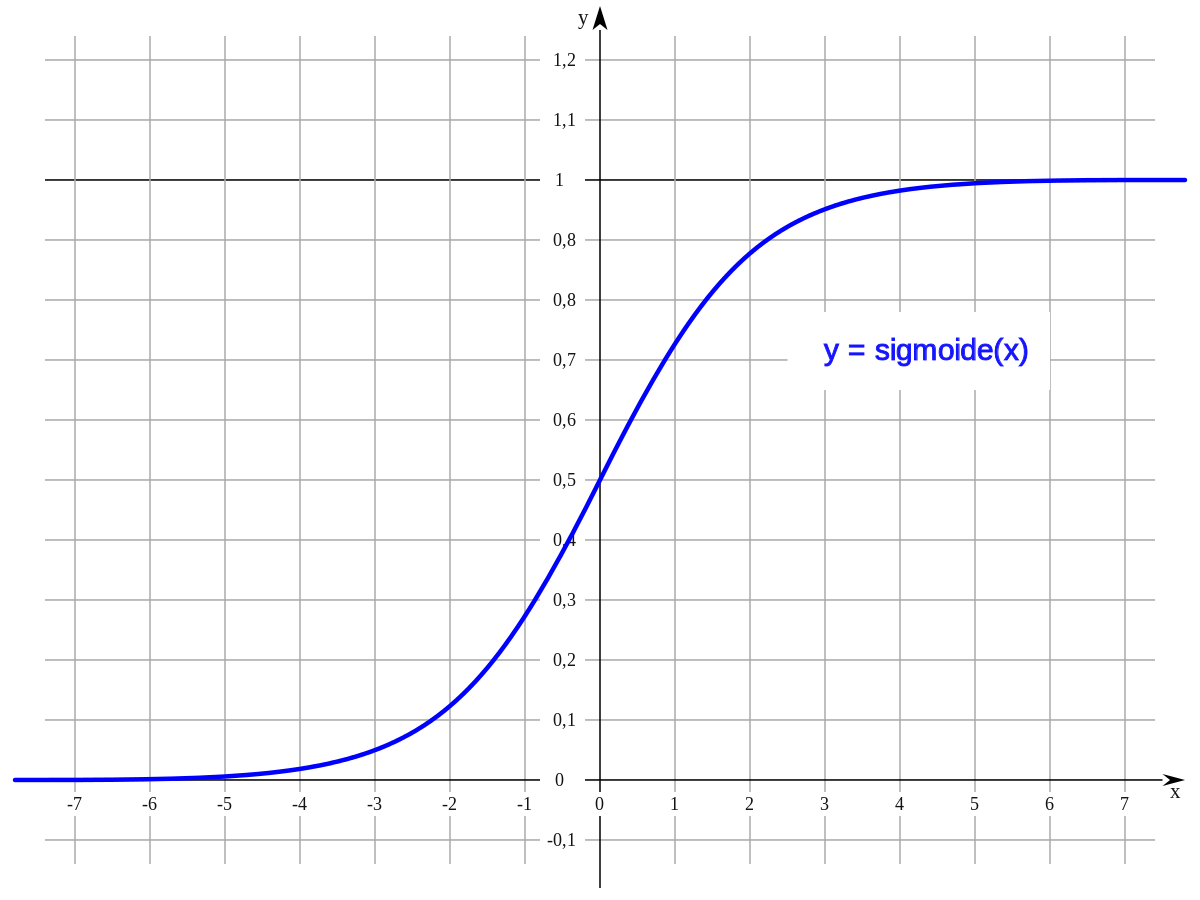

In [3]:
from IPython.display import Image

Image("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/img/sigmoid.png")

### Las tablas de contingencia
Representación de las frecuencias de caer en cada categoría.

In [4]:
import pandas as pd

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/gender-purchase/Gender Purchase.csv")
data.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [9]:
cont_table = pd.crosstab(data["Gender"], data["Purchase"])
cont_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [12]:
print(cont_table.sum(axis = 0))
print(cont_table.sum(axis = 1))

Purchase
No     231
Yes    280
dtype: int64
Gender
Female    265
Male      246
dtype: int64


In [23]:
#la transformamos a float para que salgan divisiones reales, no enteras
#el primer axis es 1 porque queremos la suma de columnas (i.e.: sumar cada fila) y el segundo 0 porque queremos la representación como filas
print(cont_table.astype(float).div(cont_table.sum(axis = 1), axis = 0))
#Se divide cada fila entre el total de esa fila

print(cont_table.astype(float).div(cont_table.sum(axis = 0), axis = 1))

Purchase       No      Yes
Gender                    
Female    0.40000  0.60000
Male      0.50813  0.49187
Purchase        No       Yes
Gender                      
Female    0.458874  0.567857
Male      0.541126  0.432143


### Probabilidad condicional

Probabilidad de que ocurra un cierto suceso conociendo ciertos datos (Por ejemplo, que un cliente compre dependiendo de su género o al revés, conocer el género conociendo que ha comprado el producto)

$$ P(Purchase=Yes/Gender=Hombre) = \frac{Número\ de\ hombres\ que\ han\ comprado}{Total\ de\ hombres} = \frac{Male \cap Purchase}{Male}$$
(primera tabla)
<br>
$$ P(Gender=Mujer/Purchase=Yes) = \frac{Número\ de\ mujeres\ que\ han\ comprado}{Total\ de\ personas\ que\ han\ comprado} = \frac{Female \cap Purchase}{Purchase}$$
(segunda tabla)

### Ratio de probabilidades
Ratio de exitos para un grupo es el cociente de las probabilidades de exito entre la probabilidad de fracaso.

$$odds_{purchase,male} = \frac{P(Purchase/Hombre)}{1 - P(Purchase/Hombre)}$$

No es un porcentaje ya que puede estar entre $[0,+\infty]$, en caso de ser 1 es equiprobable, en caso de 0 mas probable lo de abajo y en caso de mas de 1, más probable lo de arriba.

In [1]:
odds_purchase_male = 0.49187 / 0.50813 #121 / 125
odds_purchase_male

0.9680003148800503

### Estimador de máxima verosimilitud

Tenemos:
$$P_i = \frac{1}{1 + e^{-(\alpha + \beta \cdot x)}}$$

que viene de despejar $P_i$ en:

$$Ln(\frac{P_i}{1-P_i}) = \alpha + \beta \cdot x$$


Cuando $\alpha + \beta \cdot x$ sea mayor o igual que 0, la probabilidad será mayor o igual que 0.5 y predeciremos y = 1<br>
Cuando $\alpha + \beta \cdot x$ sea menor que 0, la probabilidad será menor que 0.5 y predeciremos y = 0<br><br>

Nuestra función de estimación por máxima verosimilitud será:

$$L(\alpha,\beta) = \prod^n_{i=1} P_i^{y_i} \cdot (1 - P_i)^{1 - y_i}$$<br>

De manera que la primera parte se "mostrará" cuando $y_i$ sea 1 y la segunda cuando sea 0.<br>
Para arreglar esto y poder despejar $\alpha$ y $\beta$, aplicaremos el logaritmo neperiano a los dos lados de la igualdad.

$$Ln(L(\alpha,\beta)) = Ln(\prod^n_{i=1} P_i^{y_i} \cdot (1 - P_i)^{1 - y_i})$$

Por propiedades de los logaritmos los productos pasan a convertirse en sumas y los exponentes en multiplicaciones.

$$Ln(L(\alpha,\beta)) = \sum^n_{i=1} y_i Ln(P_i) + (1 - y_i) Ln(1 - P_i)$$

Si sacamos factor común de $y_i$ a la derecha:

$$Ln(L(\alpha,\beta)) = \sum^n_{i=1} Ln(1 - P_i) + y_i (Ln(P_i) - Ln(1 - P_i)) = \sum^n_{i=1} Ln(1 - P_i) + y_i Ln(\frac{P_i}{1 - P_i})$$

Sustituimos la fórmula que tenemos al principio de este apartado:

$$Ln(L(\alpha,\beta)) = \sum^n_{i=1} Ln(1 - P_i) + y_i (\alpha + \beta \cdot x)$$

<br>
**Pequeño parentesis:**
***
Si operamos sustituyendo $P_i$ en $1-P_i$ podemos ver que:

$$ 1-P_i = \frac{1}{1+e^{\alpha + \beta \cdot x}} $$

El logaritmo de esto será:

$$ Ln(1 - P_i) = Ln(\frac{1}{1 + e^{\alpha + \beta \cdot x}}) = Ln(1) - Ln(1 + e^{\alpha + \beta \cdot x}) = \\ 
- Ln(1 + e^{\alpha + \beta \cdot x})$$
***
**Fin del parentesis**

Continuamos y podemos sustituir $Ln(1 - P_i)$:

$$ l := Ln(L(\alpha,\beta)) = \sum^n_{i=1} - Ln(1 + e^{\alpha + \beta \cdot x}) + y_i (\alpha + \beta \cdot x)$$

Esta sería la función de coste de nuestro modelo (i.e.: la que buscamos minimizar).<br>
Alcanzará un mínimo cuando:

$$ \frac{\partial{l}}{\partial{\alpha}} = \frac{\partial{l}}{\partial{\beta}} = 0$$

Omitiendo el desarrollo:

$$\frac{\partial{l}}{\partial{\alpha}} = \sum^{n}_{i=1}(y_i - P_i)$$

(Para cada feature de índice j)

$$\frac{\partial{l}}{\partial{\beta_j}} = \sum^{n}_{i=1}X_{ij}(y_i - P_i)$$

Si asumimos que $\beta_0 = \alpha$ y $X_{i0} = 1$ (i.e.: La primera feature) podemos juntar ambas cosas (y olvidarnos de $\frac{\partial{l}}{\partial{\alpha}}$) en:

$$\frac{\partial{l}}{\partial{\beta}} = \sum^{n}_{i=1}X_{i}(y_i - P_i) = X \cdot (y_i - P_i) \rightarrow \text{(Producto escalar)}$$

#### Método de Newton-Raphson

Para igualar la derivada respecto de $\beta$ a 0, utilizamos un método conocido como el método de Newton-Raphson (Nosotros en clase utilizabamos el descenso de gradiente, que es otro modo).<br><br>

Resumiendo, este método calcula el valor de las $\beta$ iterando la siguiente fórmula hasta que el incremento es apenas 0:

$$\bigtriangleup\beta = (X\omega X^t)^{-1} \cdot (X(y - P))$$

Siendo la primera parte de la multiplicación la segunda derivada de l respecto de $\beta$.<br>
$\omega$ es una matriz diagonal que en su diagonal tiene $P_i(1-P_i)$.